# Annotate Peaks

Annotate peak features such as GC content, gene features, distances from nearest genes, etc.

In [1]:
library(annotatr)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(patchwork)
library(GenomicRanges)


Attaching package: ‘patchwork’


The following object is masked from ‘package:annotatr’:

    plot_annotation


Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply

In [2]:
BED_DIR = "./beds/20200330_gridmap_peakwidthnorm_n20/"

In [3]:
bed_names = sub(".bed", "", list.files(sprintf("%s/", BED_DIR), pattern="idx[0-9]*.bed"))
bed_names

[1] "idx1"  "idx10" "idx11" "idx12" "idx13" "idx14" "idx15" "idx16" "idx17"
[10] "idx18" "idx19" "idx2"  "idx20" "idx3"  "idx4"  "idx5"  "idx6"  "idx7" 
[19] "idx8"  "idx9"

In [4]:
bed_names = bed_names[order(nchar(bed_names), bed_names)]
bed_names

[1] "idx1"  "idx2"  "idx3"  "idx4"  "idx5"  "idx6"  "idx7"  "idx8"  "idx9" 
[10] "idx10" "idx11" "idx12" "idx13" "idx14" "idx15" "idx16" "idx17" "idx18"
[19] "idx19" "idx20"

In [5]:
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

In [6]:
get_annotated_df <- function(annotations, bed_names, bed_dir, percentage=T) {
    annotated = list()

    for (i in bed_names) {
        peaks = read.table(sprintf("%s/%s.bed", bed_dir, i))
        colnames(peaks) = c("chr", "start", "end")
        peaks = makeGRangesFromDataFrame(peaks)

        dm_annotated = annotate_regions(
        regions = peaks,
        annotations = annotations,
        ignore.strand = TRUE,
        quiet = TRUE)

        dm_annsum = summarize_annotations(
        annotated_regions = dm_annotated,
        quiet = TRUE)

        annotated[[i]] = dm_annsum
        }
    
    # specific to type of annotation, this one for gene level annotation
    annotated_df = data.frame(annotated[[1]])
    annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
    rownames(annotated_df) = annotated_df$annot.type
    annotated_df$annot.type = NULL
    colnames(annotated_df) = bed_names[1]

    for (i in bed_names[2:length(bed_names)]) {
        cur_df = annotated[[i]]
        rownames(cur_df) = cur_df$annot.type
        annotated_df[, sprintf("%s", i)] = cur_df[rownames(annotated_df), "n"]
    }
    
    # replace NA with 0
    annotated_df[is.na(annotated_df)] = 0
    
    # get percentage
    if (percentage) {
        annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))
    }

    annotated_df
}

## Genes

In [44]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_basicgenes', 
                                                                 'hg38_genes_intergenic',
                                                                 'hg38_genes_intronexonboundaries'))

'select()' returned 1:1 mapping between keys and columns

Building promoters...

Building 1to5kb upstream of TSS...

Building intergenic...

Building 5UTRs...

Building 3UTRs...

Building exons...

Building introns...

Building intron exon boundaries...

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 131 out-of-bound ranges located on sequences
  chr1_GL383518v1_alt, chr2_GL383522v1_alt, chr5_GL339449v2_alt,
  chr5_KI270795v1_alt, chr5_KI270898v1_alt, chr6_KI270797v1_alt,
  chr6_KI270798v1_alt, chr6_KI270801v1_alt, chr7_GL383534v2_alt,
  chr7_KI270803v1_alt, chr7_KI270806v1_alt, chr7_KI270809v1_alt,
  chr8_KI270821v1_alt, chr9_GL383540v1_alt, chr9_GL383541v1_alt,
  chr11_KI270902v1_alt, chr12_GL383551v1_alt, chr12_GL383553v2_alt,
  chr12_KI270834v1_alt, chr14_KI270847v1_alt, chr15_KI270850v1_alt,
  chr16_KI270854v1_alt, chr17_JH159146v1_alt, chr17_JH159147v1_alt,
  chr17_KI270857v1_alt, chr17_KI270860v1_alt, chr19_GL383575v2_alt,
  chr1

In [45]:
genic_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR)

Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a

In [46]:
genic_annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
hg38_genes_1to5kb,5.3576995,11.933079,14.644447,14.960895,8.0281000,7.2526750,13.287734,12.657436,10.567228,13.563140,9.4615927,8.073379,8.202816,7.172850,8.470905,11.046686,10.407892,8.0037111,10.3515340,9.8082215
hg38_genes_3UTRs,0.7793017,2.122574,1.659900,2.527785,2.5388008,1.7127415,2.988651,1.002680,2.348019,2.065712,2.0421187,1.306112,1.764188,1.763014,2.061111,2.351295,1.954482,2.2730787,2.2025575,2.0876333
hg38_genes_5UTRs,1.1182980,1.280373,11.318098,6.243685,0.4149649,0.4345762,4.053848,15.899955,2.242850,1.916946,0.5944984,1.470961,0.633524,0.408398,1.358758,1.641508,0.857164,0.3309108,0.6369427,0.8234434
hg38_genes_exons,5.5057668,7.562738,16.618649,13.765296,5.6820781,5.3317752,12.891280,18.747209,9.709870,8.764398,6.0289524,6.205089,5.767708,4.975554,8.155831,8.369489,6.635631,5.5203340,6.4958429,7.0003440
hg38_genes_intergenic,42.4134975,23.832015,3.622643,9.310332,24.5482764,30.6942263,14.185201,1.319786,21.141316,16.823224,25.4794613,33.181165,25.934888,28.550475,26.036299,19.470159,23.546146,26.3336941,22.7792094,23.0370657
hg38_genes_intronexonboundaries,3.9588529,6.327889,12.323206,10.651873,5.2442411,4.7292116,9.994119,13.633318,8.070601,6.749692,5.6494139,4.784851,5.054993,4.584412,6.429486,6.857943,5.490283,5.0688109,5.9269704,6.5595975
hg38_genes_introns,36.7129052,41.871052,22.837546,29.459642,50.8021565,47.0109192,32.456924,17.221974,39.385903,43.481957,47.2676586,40.514836,49.368676,49.887834,42.814008,44.514646,46.737604,49.7881552,48.1548111,46.3987788
hg38_genes_promoters,4.1536783,5.070278,16.975511,13.080492,2.7413821,2.8338750,10.142244,19.517642,6.534214,6.634930,3.4763040,4.463606,3.273207,2.657463,4.673603,5.748276,4.370797,2.6813051,3.4521321,4.2849157


In [47]:
# rename rows
rownames(genic_annotated_df) = lapply(strsplit(rownames(genic_annotated_df), "_"), "[[", 3)

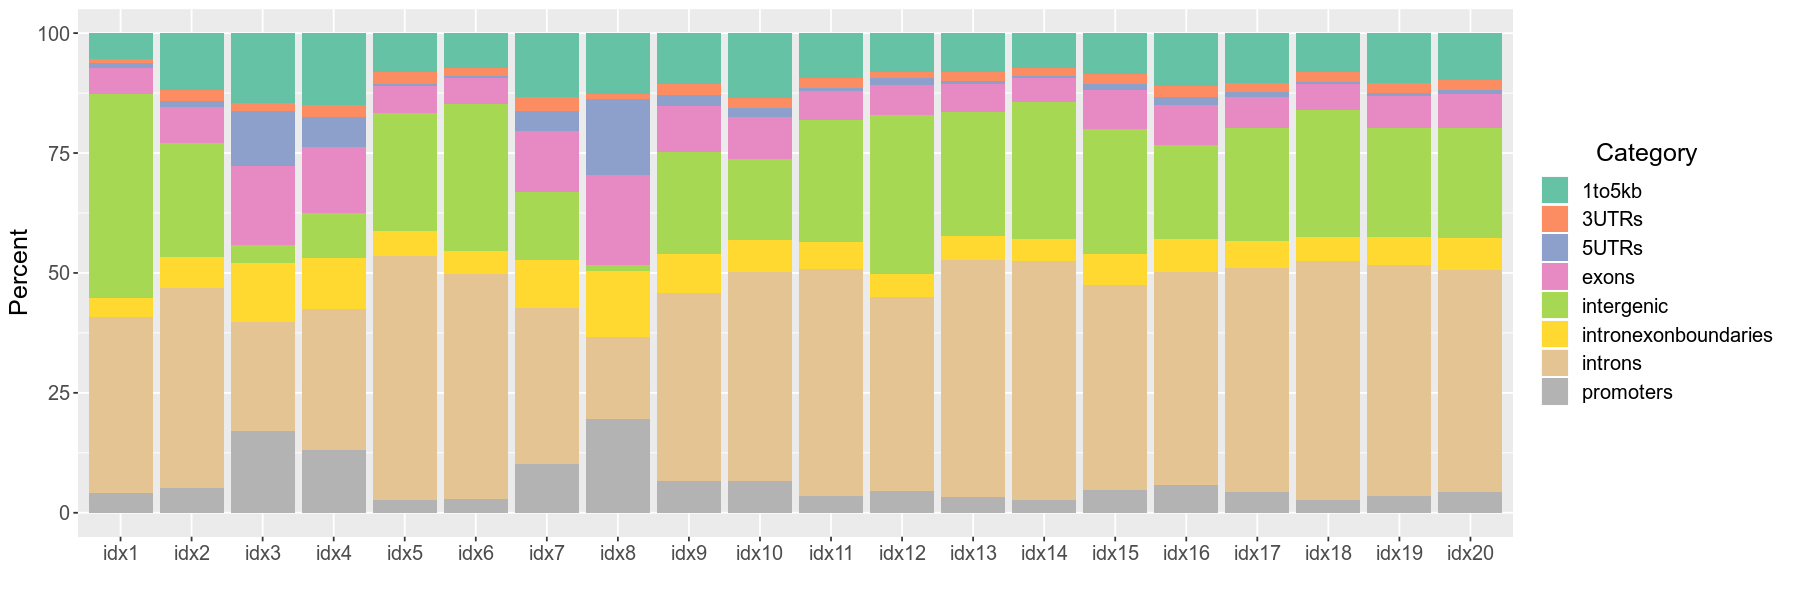

In [49]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(genic_annotated_df), aes(x=factor(Var2, levels=colnames(genic_annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## CpG

In [18]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_cpgs'))

Building CpG islands...

Building CpG shores...

Building CpG shelves...

Building inter-CpG-islands...



In [19]:
cpg_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR)

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a

In [20]:
cpg_annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
hg38_cpg_inter,90.2346603,87.677165,18.950007,44.011595,97.7553921,97.81576448,59.50144,6.800689,79.202147,82.6972010,93.9314331,90.536895,96.97249245,98.58766061,87.870467,87.192741,93.47986792,97.76437884,93.08558850,92.5069353
hg38_cpg_islands,4.3827611,1.070866,34.733078,18.134898,0.3009530,0.06331117,13.35528,48.799540,6.673072,0.8969466,0.5385525,2.946310,0.04193224,0.09203214,4.463040,1.507581,0.07885269,0.01957637,0.07121585,0.5519054
hg38_cpg_shelves,0.7715486,5.236220,3.845303,6.055571,1.0282561,1.25265681,5.59213,1.424469,3.303403,7.7290076,2.7190332,1.951865,1.75276753,0.70793954,1.477510,4.359063,3.83914051,1.35468462,3.94924252,3.0865820
hg38_cpg_shores,4.6110299,6.015748,42.471612,31.797936,0.9153988,0.86826753,21.55115,42.975302,10.821378,8.6768448,2.8109812,4.564930,1.23280778,0.61236770,6.188982,6.940616,2.60213888,0.86136017,2.89395313,3.8545773


In [21]:
# rename rows
rownames(cpg_annotated_df) = lapply(strsplit(rownames(cpg_annotated_df), "_"), "[[", 3)

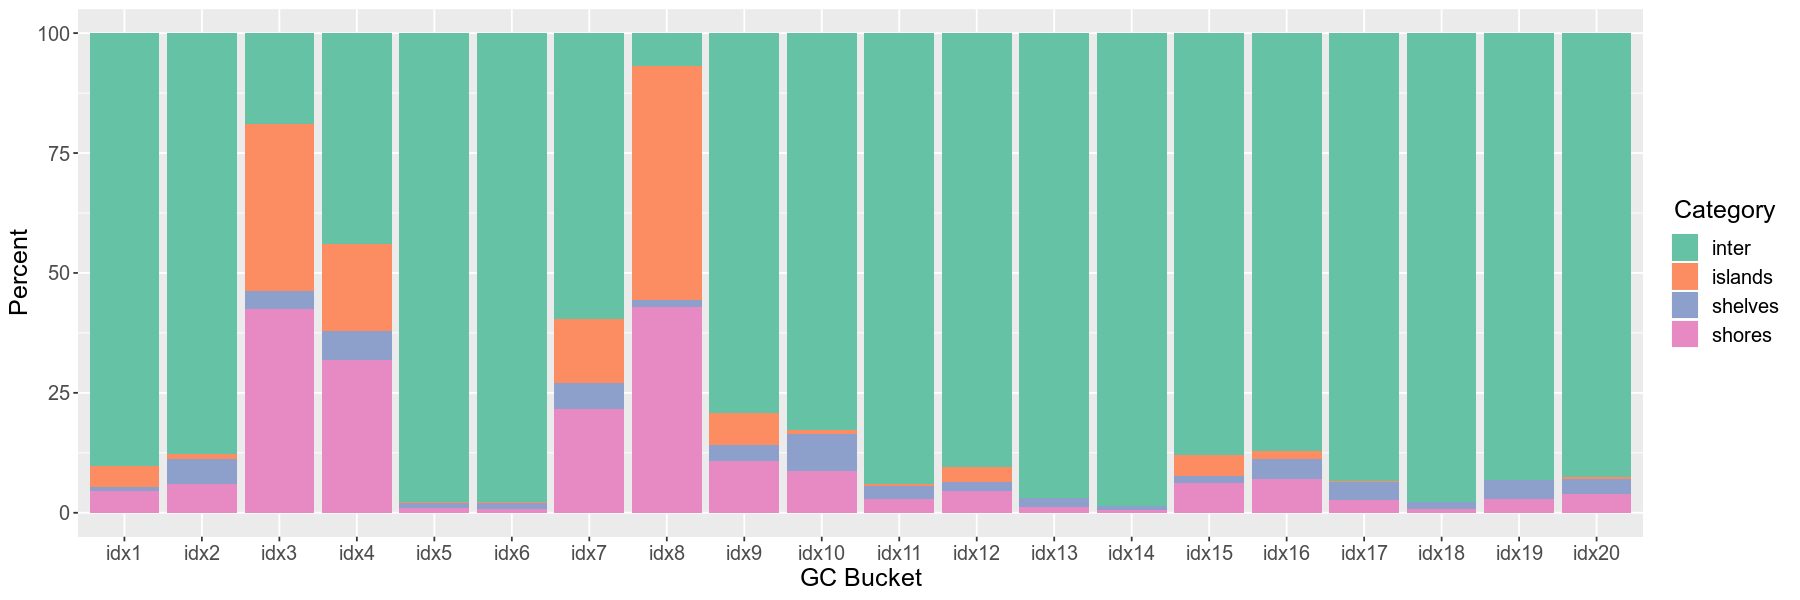

In [22]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(cpg_annotated_df), aes(x=factor(Var2, levels=colnames(cpg_annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("GC Bucket") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## Distance From Nearest Gene

In [23]:
library(EnsDb.Hsapiens.v86)

Loading required package: ensembldb

Loading required package: AnnotationFilter


Attaching package: 'ensembldb'


The following object is masked from 'package:stats':

    filter




In [24]:
edb <- EnsDb.Hsapiens.v86

In [25]:
genes.hg38 = genes(edb, column = "gene_name", filter = GeneBiotypeFilter("protein_coding"))

In [26]:
tss.hg38 = resize(genes.hg38, width=1, fix='start')
head(tss.hg38, 2)

GRanges object with 2 ranges and 3 metadata columns:
                  seqnames    ranges strand |   gene_name         gene_id
                     <Rle> <IRanges>  <Rle> | <character>     <character>
  ENSG00000186092        1     69091      + |       OR4F5 ENSG00000186092
  ENSG00000279928        1    182393      + |  FO538757.2 ENSG00000279928
                    gene_biotype
                     <character>
  ENSG00000186092 protein_coding
  ENSG00000279928 protein_coding
  -------
  seqinfo: 287 sequences from GRCh38 genome

In [32]:
plots = list()

for (i in bed_names) {
    # take mid of peaks
    peaks = read.table(sprintf("%s/%s.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks$chr = sub("chr", "", peaks$chr)
    peaks_mid = as.integer((peaks$start+peaks$end)/2)
    peaks$start = peaks_mid
    peaks$end = peaks_mid+1
    peaks = makeGRangesFromDataFrame(peaks)
    
    dists = data.frame(distanceToNearest(peaks, tss.hg38, ignore.strand=TRUE))$distance
    print(sprintf("%s : %s" , i, median(dists)))
    plots[[i]] <- ggplot(data.frame(d=dists+1), aes(x=d)) + 
        geom_histogram(bins=50, col='black', alpha=0.5, fill='red') +
        scale_x_log10() +
        coord_cartesian(xlim=c(1,1e7)) +
        ggtitle(sprintf("%s", i)) +  
        xlab("Distance from Nearest TSS") + ylab("Count") + 
        geom_vline(xintercept = 1000, linetype="dashed") +
        theme(plot.title = element_text(hjust = 0.5))
}

[1] "idx1 : 127738.5"
[1] "idx2 : 46200"
[1] "idx3 : 1725.5"
[1] "idx4 : 12568"
[1] "idx5 : 74842"
[1] "idx6 : 81062.5"
[1] "idx7 : 22359"
[1] "idx8 : 387"
[1] "idx9 : 39134"
[1] "idx10 : 42150"
[1] "idx11 : 56019"
[1] "idx12 : 72008.5"
[1] "idx13 : 70465"
[1] "idx14 : 86378.5"
[1] "idx15 : 51730.5"
[1] "idx16 : 42596"
[1] "idx17 : 60041"
[1] "idx18 : 82371.5"
[1] "idx19 : 60702"
[1] "idx20 : 51014"


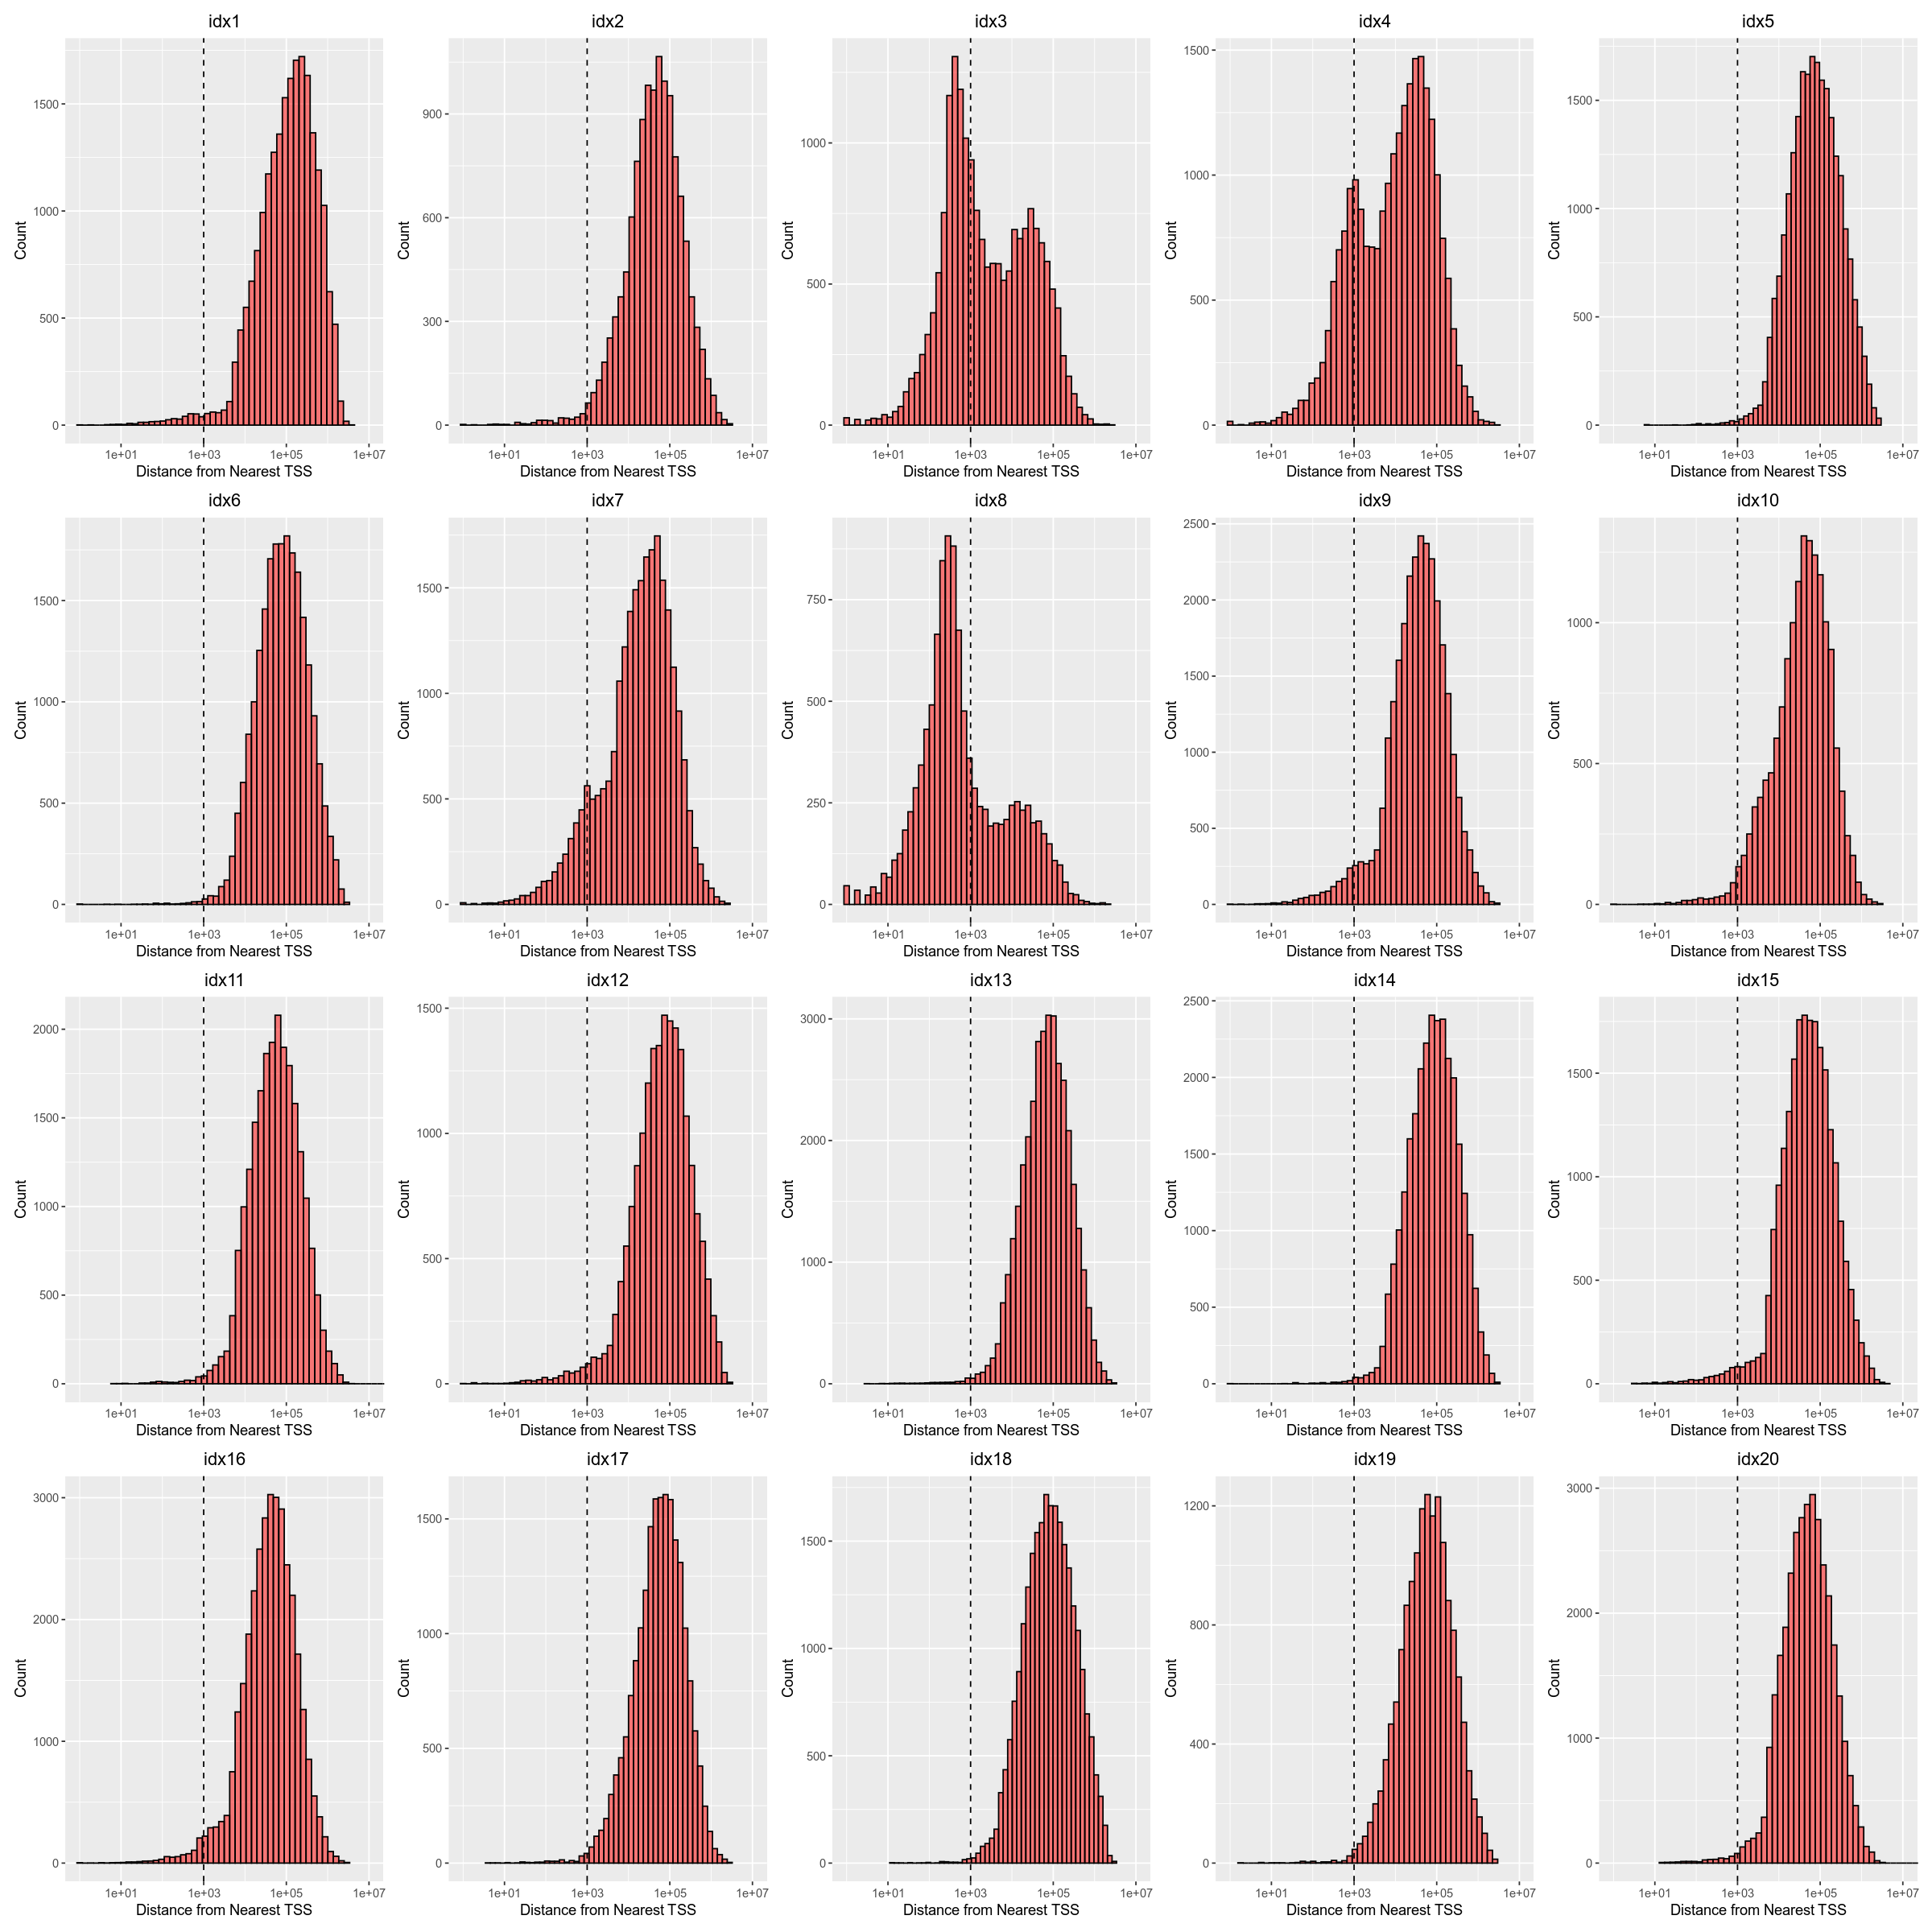

In [29]:
options(repr.plot.width = 20, repr.plot.height = 20)
wrap_plots(plots, ncol = 5)

## RepeatMasker

In [12]:
gzf = gzfile("/users/surag/kundajelab/scATAC-reprog/resources/RepeatMasker/hg38.bed.gz")
gr = read.table(gzf)
colnames(gr) = c("chr", "start", "end", "type")
annotations = makeGRangesFromDataFrame(gr)
annotations$type = gr$type
annotations

GRanges object with 5622516 ranges and 1 metadata column:
                          seqnames            ranges strand |            type
                             <Rle>         <IRanges>  <Rle> |        <factor>
        [1]                   chr1       10001-10468      * |   Simple_repeat
        [2]                   chr1       10469-11447      * |  Satellite/telo
        [3]                   chr1       11485-11676      * |         LINE/L1
        [4]                   chr1       11678-11780      * | DNA/hAT-Charlie
        [5]                   chr1       15265-15355      * |        SINE/MIR
        ...                    ...               ...    ... .             ...
  [5622512]                   chrY 57216407-57217320      * |   Simple_repeat
  [5622513]                   chrY 57217321-57217413      * |   Simple_repeat
  [5622514] chrY_KI270740v1_random           229-540      * |        SINE/Alu
  [5622515] chrY_KI270740v1_random           625-867      * |         LINE/L1
  [562

In [80]:
rep_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR)

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a

In [81]:
head(rep_annotated_df)

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
DNA,0.11010460,0.15398830,0.08195602,0.12948476,0.14044944,0.1672853,0.11287956,0.02821272,0.1362862,0.28107934,0.10342950,0.09735425,0.2734631,0.2718298,0.17823262,0.2540151,0.26370992,0.28268849,0.19195174,0.2162972
DNA?,0.06506181,0.04619649,0.04097801,0.04855678,0.14044944,0.1516023,0.03386387,0.01410636,0.0681431,0.09637006,0.10887316,0.04008705,0.1859549,0.1335304,0.04024608,0.1065225,0.07791429,0.16455002,0.10968671,0.1164677
DNA/hAT,0.04504279,0.12319064,0.21171971,0.25896952,0.10654785,0.1620576,0.18625127,0.22570179,0.1752251,0.23289431,0.09798585,0.11453442,0.1640779,0.1478373,0.10348991,0.2007539,0.17380881,0.09704232,0.20566258,0.1331059
DNA/hAT-Ac,0.05505230,0.10009239,0.14342303,0.14567035,0.07264626,0.1516023,0.09594762,0.07053181,0.1508883,0.16061677,0.07076756,0.09735425,0.1567855,0.2050646,0.05749439,0.1515896,0.17380881,0.13079617,0.08226503,0.1788611
DNA/hAT-Blackjack,0.18517592,0.18478596,0.21854938,0.33989749,0.32448663,0.3345705,0.37250254,0.21159543,0.3309808,0.43366527,0.31573217,0.22906884,0.6563115,0.6104249,0.28747197,0.4793510,0.66526820,0.29112696,0.29478303,0.3660413
DNA/hAT-Charlie,3.02287173,5.87465353,3.98852616,5.83760453,5.02712127,6.9423389,6.06163224,2.70842150,6.3081042,6.40057822,4.44746870,4.63864391,6.2203748,6.9865039,5.03075950,6.5347427,6.56278094,6.31196996,6.68403373,5.6237261


In [82]:
rep_annotated_df = (rep_annotated_df[rowSums(rep_annotated_df<1)==0, ])

In [85]:
rep_annotated_df = rep_annotated_df[, c("idx2", "idx12", "idx9", "idx7", "idx1", "idx15", # open on-target
                                        "idx5", "idx18", "idx11", "idx20", "idx19", # open transient
                                        "idx13", "idx14", "idx17", "idx10", "idx16")] # close

# rep_annotated_df = rep_annotated_df[, c("idx2", "idx1", "idx5", "idx18", "idx13", "idx14")]

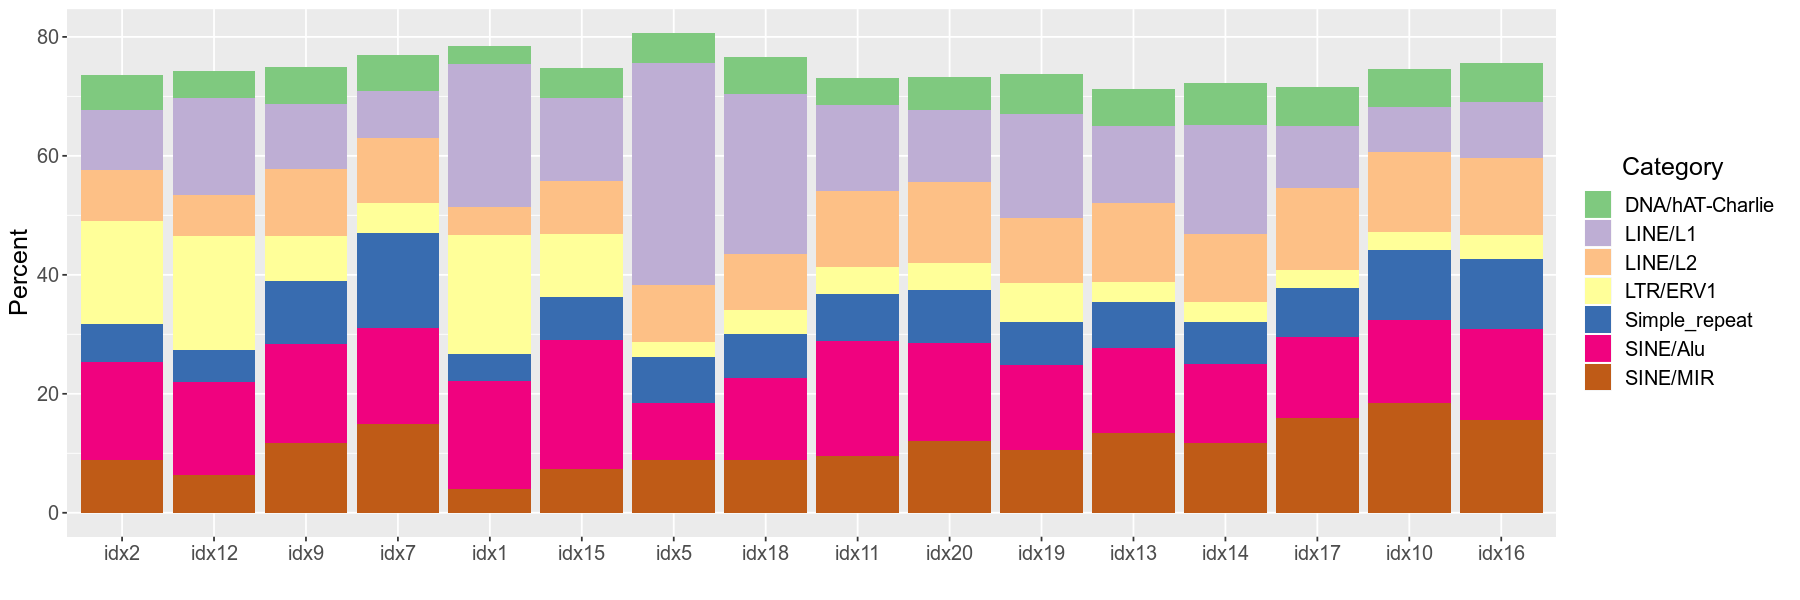

In [93]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(rep_annotated_df), aes(x=factor(Var2, levels=colnames(rep_annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_manual(values=col_vector[seq(1,length(col_vector),1)]) +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

In [87]:
rep_annotated_expected = outer((rowSums(rep_annotated_df)/sum(rep_annotated_df)), colSums(rep_annotated_df))

In [88]:
rep_annotated_fc = rep_annotated_df/rep_annotated_expected

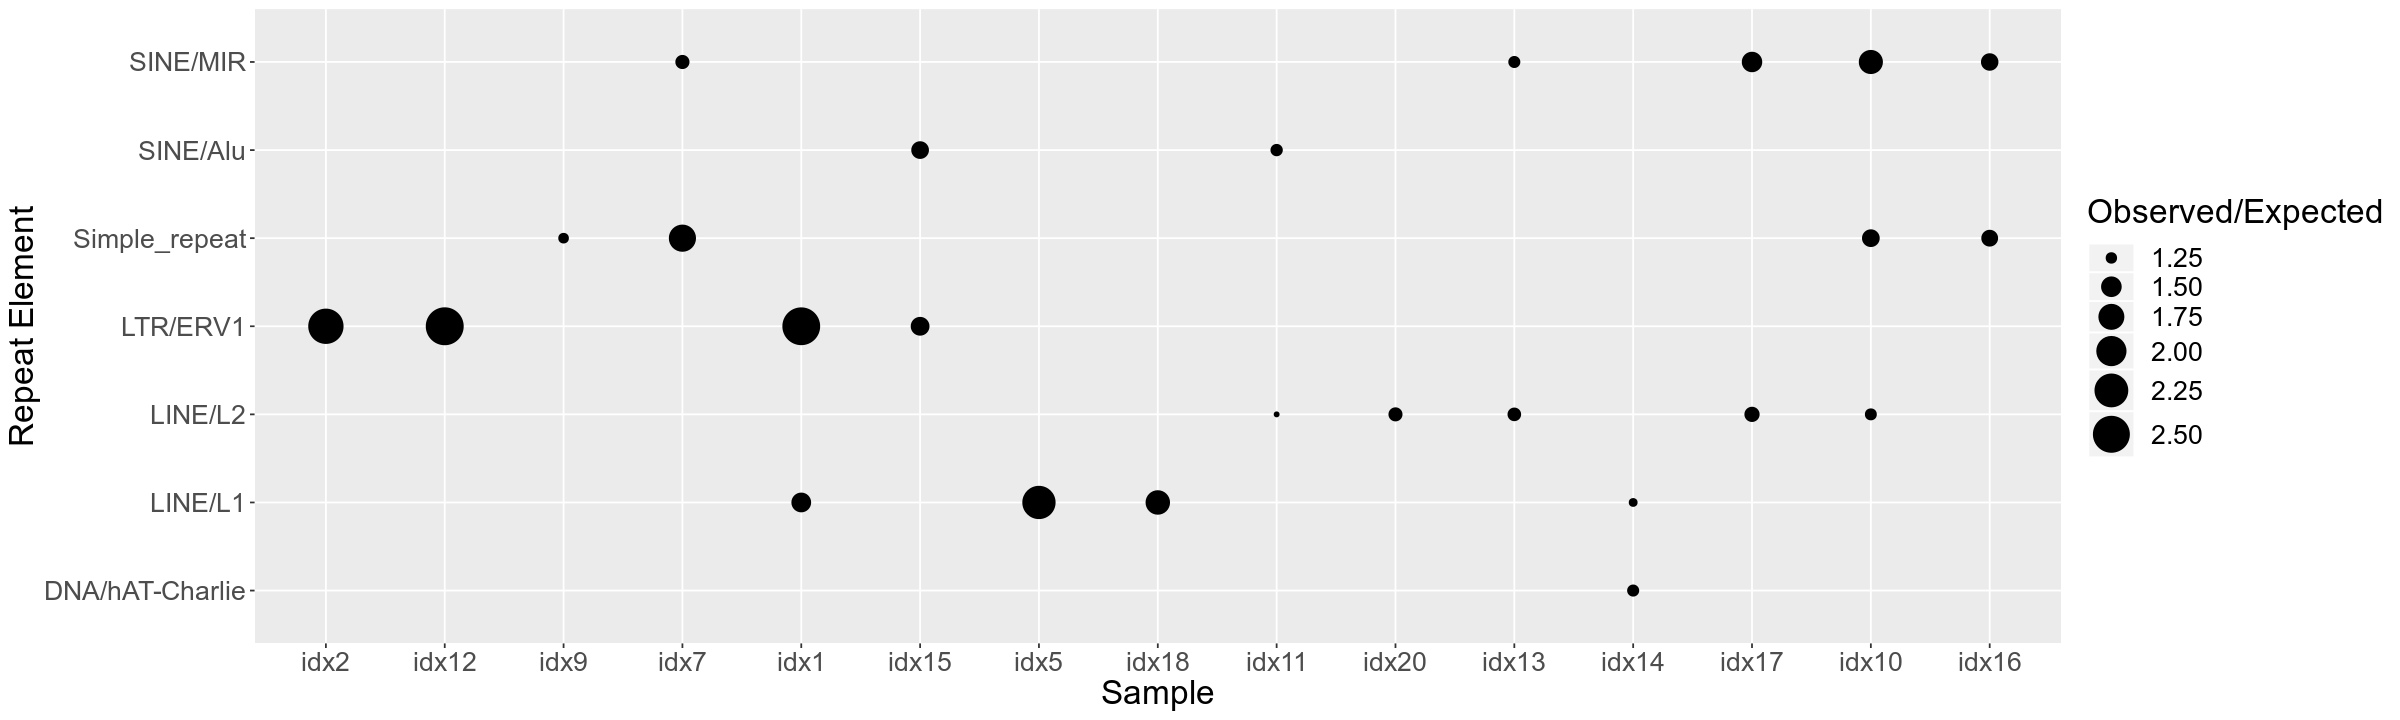

In [89]:
options(repr.plot.width = 20, repr.plot.height = 6)
ggplot(melt(as.matrix(rep_annotated_fc))[melt(as.matrix(rep_annotated_fc))$value>1.2,], aes(x=factor(Var2, levels=colnames(rep_annotated_fc)), 
                                                       y=Var1, size=value)) +
xlab("Sample") +
ylab("Repeat Element") +
geom_point() + 
scale_size_continuous(range = c(1, 10)) +
theme(legend.title.align=0.4,
text=element_text(size=20)) +
labs(size='Observed/Expected') 

## ChromHMM - Fibroblast

In [33]:
gzf = gzfile("/users/surag/kundajelab/scATAC-reprog/resources/ChromHMM/E055_15_coreMarks_hg38lift_mnemonics.bed.gz")
gr = read.table(gzf)
colnames(gr) = c("chr", "start", "end", "type")
annotations = makeGRangesFromDataFrame(gr)
annotations$type = gr$type
annotations

GRanges object with 671383 ranges and 1 metadata column:
           seqnames            ranges strand |        type
              <Rle>         <IRanges>  <Rle> |    <factor>
       [1]     chr1       10000-10800      * |       9_Het
       [2]     chr1       10800-12600      * |    15_Quies
       [3]     chr1       12600-18400      * |      5_TxWk
       [4]     chr1       18400-88600      * |    15_Quies
       [5]     chr1       88600-90600      * | 14_ReprPCWk
       ...      ...               ...    ... .         ...
  [671379]     chrY 56887453-57217249      * |    15_Quies
  [671380]     chrM           0-12799      * |    15_Quies
  [671381]     chrM       12799-12999      * |       9_Het
  [671382]     chrM       12999-13199      * |  8_ZNF/Rpts
  [671383]     chrM       13199-16398      * |      5_TxWk
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [34]:
fib_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR)

Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a

In [35]:
fib_annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
1_TssA,0.20212001,0.4576024,34.20529143,14.5619434,0.19081645,0.05134788,3.8012730,56.80005065,1.2324249,5.51529412,0.30115512,0.39156627,1.25786164,0.54246696,0.4258804,2.7529203,2.55225777,0.183191267,0.44891465,0.6708328
10_TssBiv,0.17517068,0.3050683,5.67933161,4.3192897,0.02841947,0.01711596,3.9515559,4.50804103,1.8746745,0.16000000,0.06188119,0.57228916,0.06011839,0.02523102,0.5405405,0.6102420,0.03079647,0.007477195,0.01704739,0.1989542
11_BivFlnk,0.07186489,0.5338695,6.68390690,9.3030856,0.07713857,0.00855798,9.5856907,2.76054198,3.1996760,1.07294118,0.05363036,0.56726908,0.18729190,0.03153878,0.5814906,1.8079559,0.35030989,0.000000000,0.06250710,0.3570973
12_EnhBiv,0.12576356,1.8373431,1.79033221,5.1907732,0.07713857,0.23534446,8.6103253,0.25959225,4.8747324,2.60235294,0.56105611,0.62751004,2.17351091,0.69385309,1.3923014,5.7016645,2.41752319,0.059817556,0.94897147,3.1475577
13_ReprPC,2.78027309,9.8245857,1.10735362,4.2294180,1.26669644,4.83097989,11.2505893,0.10763581,15.5123532,1.01647059,9.87623762,7.26405622,2.54578246,1.72517110,11.6748567,6.3984334,1.36274397,1.869298639,4.89260143,10.9679888
14_ReprPCWk,8.32734459,16.5152881,2.44347192,7.2523762,10.35686736,15.28883184,10.6700849,0.75978220,14.2452121,2.17882353,17.38861386,15.64759036,7.96337403,9.31655470,16.4168714,8.3703350,4.33460369,10.311051294,11.50698943,13.0570080
15_Quies,46.12378728,27.8236151,1.74060076,5.6128980,51.90613455,47.15447154,10.2074493,0.44320628,18.7236012,4.19764706,30.94471947,41.09939759,19.43904920,36.31690163,29.6519247,13.3114739,9.49686261,51.573949454,31.48653256,22.4282617
2_TssAFlnk,0.07186489,0.9776052,27.72362575,17.8490700,0.14209736,0.14548567,6.5063649,26.36444219,1.8688885,24.89411765,0.22277228,0.26104418,4.32389937,1.08808780,0.4791155,7.8853291,11.86819109,0.145805294,1.00579611,1.5482719
3_TxFlnk,0.02245778,0.6032032,5.08918507,3.9489093,0.03653932,0.02139495,2.2041490,4.04584019,0.7811144,4.69647059,0.18564356,0.09538153,0.54568997,0.12300123,0.2047502,1.9445773,1.53982369,0.033647376,0.49437436,0.5866599
4_Tx,2.04814948,7.0720377,0.36469730,1.6449250,6.10206650,5.66110398,3.9338755,0.05698366,6.7089047,0.46588235,9.64933993,4.12650602,2.04864965,2.73441196,8.0016380,2.6914407,0.92774377,6.015403021,6.50073872,6.5603877


In [36]:
# rename rows
rownames(fib_annotated_df) = lapply(strsplit(rownames(fib_annotated_df), "_"), "[[", 2)

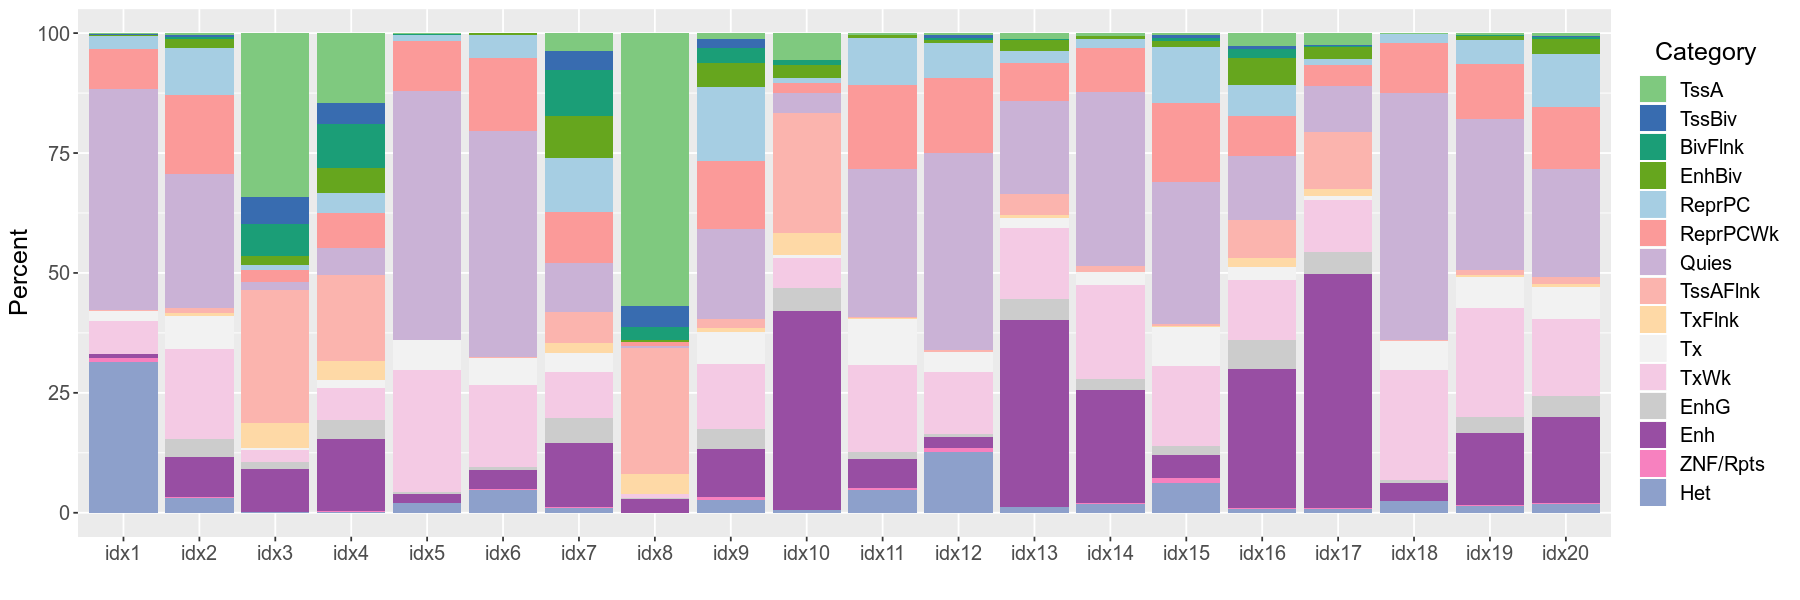

In [37]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(fib_annotated_df), aes(x=factor(Var2, levels=colnames(fib_annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_manual(values=col_vector[seq(1,length(col_vector),4)]) +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## ChromHMM - ESC

In [38]:
gzf = gzfile("/users/surag/kundajelab/scATAC-reprog/resources/ChromHMM/E003_15_coreMarks_hg38lift_mnemonics.bed.gz")
gr = read.table(gzf)
colnames(gr) = c("chr", "start", "end", "type")
annotations = makeGRangesFromDataFrame(gr)
annotations$type = gr$type

In [39]:
h1_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR)

Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a

In [40]:
h1_annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
1_TssA,2.82114604,2.2487702,33.9980646,14.1757128,0.17192681,0.069572335,5.5636669,61.9642000,1.97723539,1.05088496,0.25022266,2.8304020,0.032032460,0.020800111,0.9578544,1.0937143,0.139385773,0.093724226,0.21216407,0.26157108
10_TssBiv,0.84550668,0.5110841,10.2889334,8.6351136,0.04502845,0.036832413,7.2225156,6.3918798,3.28268012,0.33738938,0.06361593,1.4287652,0.010677487,0.020800111,1.2172733,0.7130713,0.027877155,0.000000000,0.02357379,0.09361491
11_BivFlnk,0.66133691,0.7794033,8.3534942,8.1458967,0.02046748,0.036832413,7.3374546,4.1492353,3.35601971,0.55862832,0.05937487,0.9901885,0.000000000,0.003466685,1.1294700,0.8501028,0.032523347,0.007497938,0.04714757,0.10187505
12_EnhBiv,1.03804780,2.0890564,3.1658257,5.0050659,0.04912195,0.376509106,5.2374887,1.1384679,3.12426660,1.92477876,0.27991009,1.5689289,0.226896589,0.086667129,1.4447637,1.7484203,0.413511128,0.108720102,0.54219708,0.66356453
13_ReprPC,0.80783559,1.1371622,1.7177024,2.6545086,0.38478857,0.630243503,2.5628281,0.5555175,1.93323164,1.93584071,0.89486407,1.0444454,0.670012279,0.447202385,1.3370051,1.7103560,1.133670957,0.476119067,0.85454974,1.17018640
14_ReprPCWk,1.81239797,2.8620712,2.1911938,3.9745260,1.78885751,2.242684674,4.0756733,0.9190042,3.87233044,5.12721239,4.24954409,2.1612334,3.109817949,2.208278444,3.0212324,4.3748573,4.571853366,1.833245857,3.63036304,4.62017126
15_Quies,54.75702147,30.5628314,6.6392479,15.9183673,69.85140612,58.547165950,22.2515610,2.3935258,34.34053039,40.21570796,61.32999703,39.9918615,67.567134696,74.880399362,46.3362069,42.1803233,62.235747805,68.073779711,54.67939651,55.73666676
2_TssAFlnk,0.96270562,2.0890564,11.8580217,6.8519323,0.03684146,0.061387354,3.8861794,12.2762499,1.53719784,0.89601770,0.05513381,1.8537776,0.042709946,0.003466685,0.6545338,0.6318674,0.051108117,0.026242783,0.14144272,0.12114871
3_TxFlnk,0.07952786,0.1533252,0.4492984,0.2518454,0.00000000,0.008184981,0.1335777,0.3909197,0.06453884,0.11615044,0.00000000,0.1582493,0.005338743,0.006933370,0.0199553,0.0380643,0.004646192,0.003748969,0.02357379,0.00550676
4_Tx,1.48172952,3.1814988,0.8294740,2.0176581,6.35719841,3.454061797,3.0940325,0.1920307,3.80485801,3.96570796,7.17163578,1.9622915,4.369761358,4.156555502,4.3303001,4.1794605,4.506806672,5.312289120,5.46911834,5.93628679


In [41]:
# rename rows
rownames(h1_annotated_df) = lapply(strsplit(rownames(h1_annotated_df), "_"), "[[", 2)

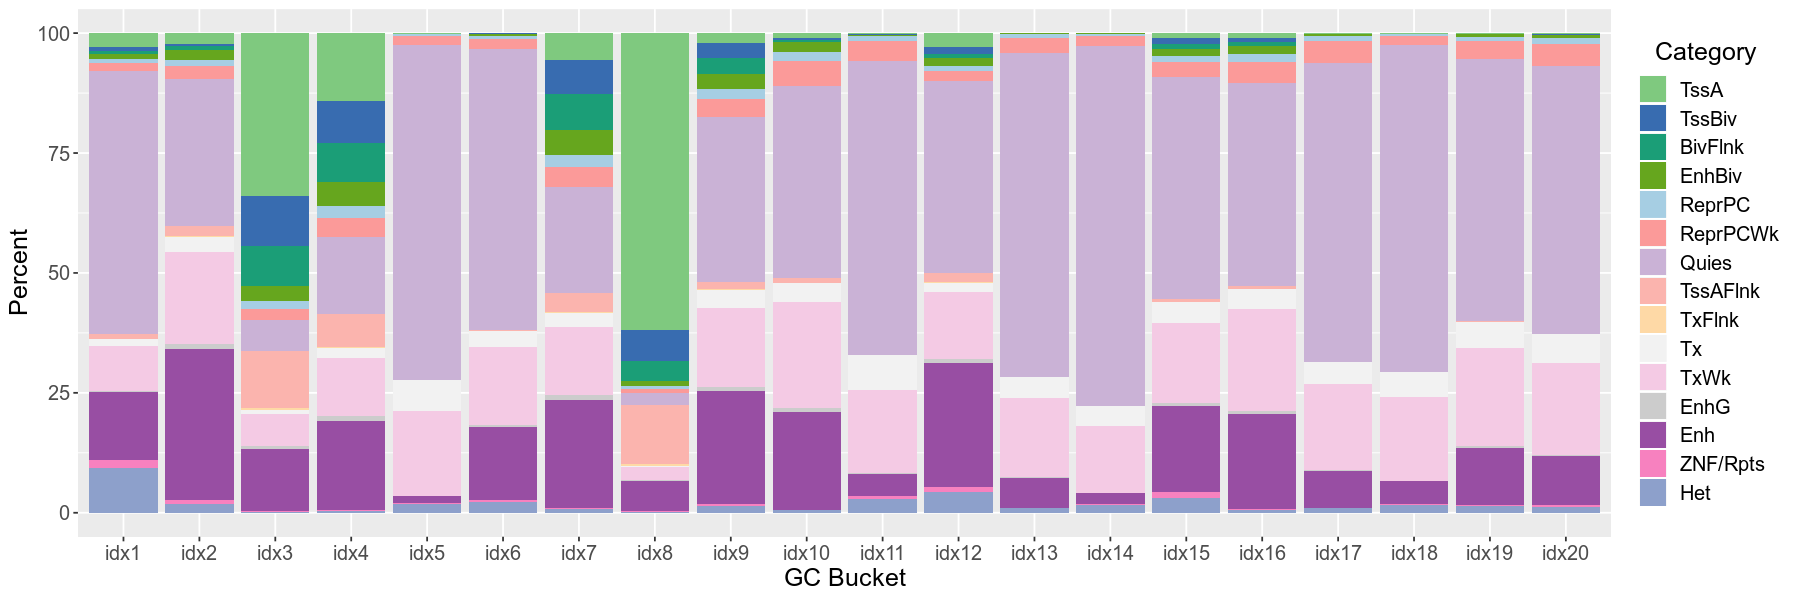

In [42]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(h1_annotated_df), aes(x=factor(Var2, levels=colnames(h1_annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_manual(values=col_vector[seq(1,length(col_vector),4)]) +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("GC Bucket") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## DHS Index

In [10]:
gzf = gzfile("/users/surag/kundajelab/scATAC-reprog/resources/DHSIndex/DHS_Index_and_Vocabulary_hg38_WM20190703.txt.gz")
gr = read.table(gzf, sep='\t', header=T)
annotations = makeGRangesFromDataFrame(gr[,c("seqname", "start", "end")])
annotations$type = gr$component

In [11]:
dhs_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR, percentage = F)

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a

In [12]:
dhs_annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Cancer / epithelial,652,914,955,1114,916,1728,1081,450,1324,788,1963,879,1695,1490,995,1623,954,1825,1655,2641
Cardiac,284,481,1785,1854,396,820,1401,672,1359,1045,667,422,1599,889,718,2477,958,644,742,1807
Digestive,579,1123,1807,2142,552,1286,2006,715,1789,1040,1177,920,1477,914,1019,2254,1076,858,1018,1884
Lymphoid,861,959,4009,4016,987,1344,3006,1584,2490,1396,1279,938,1852,1050,1462,3146,1238,1278,1118,2444
Musculoskeletal,530,747,1820,2385,777,1301,2074,629,1962,1788,1504,632,3184,2130,1164,3713,1867,1184,1204,3155
Myeloid / erythroid,739,870,1896,1856,788,1243,1693,742,1823,879,1288,694,1429,831,1158,2140,843,1121,1132,2070
Neural,1642,1660,2693,3778,2604,3513,3930,830,3680,1797,2280,1890,3105,1991,2398,4901,1901,3471,2345,3772
Organ devel. / renal,947,765,3119,3749,321,1064,3305,1587,3163,1409,1013,1121,1891,1026,1720,3450,1069,493,577,2416
Placental / trophoblast,2052,1303,1788,1954,687,1567,2117,763,2723,1193,1505,1920,1768,1083,2386,2357,1154,1149,1065,2473


In [61]:
dhs_annotated_df_percentage = 100*t(t(dhs_annotated_df)/colSums(dhs_annotated_df))

In [62]:
# dhs_annotated_df_percentage = dhs_annotated_df_percentage[, c("idx2", "idx12", "idx9", "idx7", "idx1", "idx15", # open on-target
#                                         "idx5", "idx11", "idx20", "idx18", "idx19", # open transient
#                                         "idx13", "idx14", "idx17", "idx10", "idx16")] # close

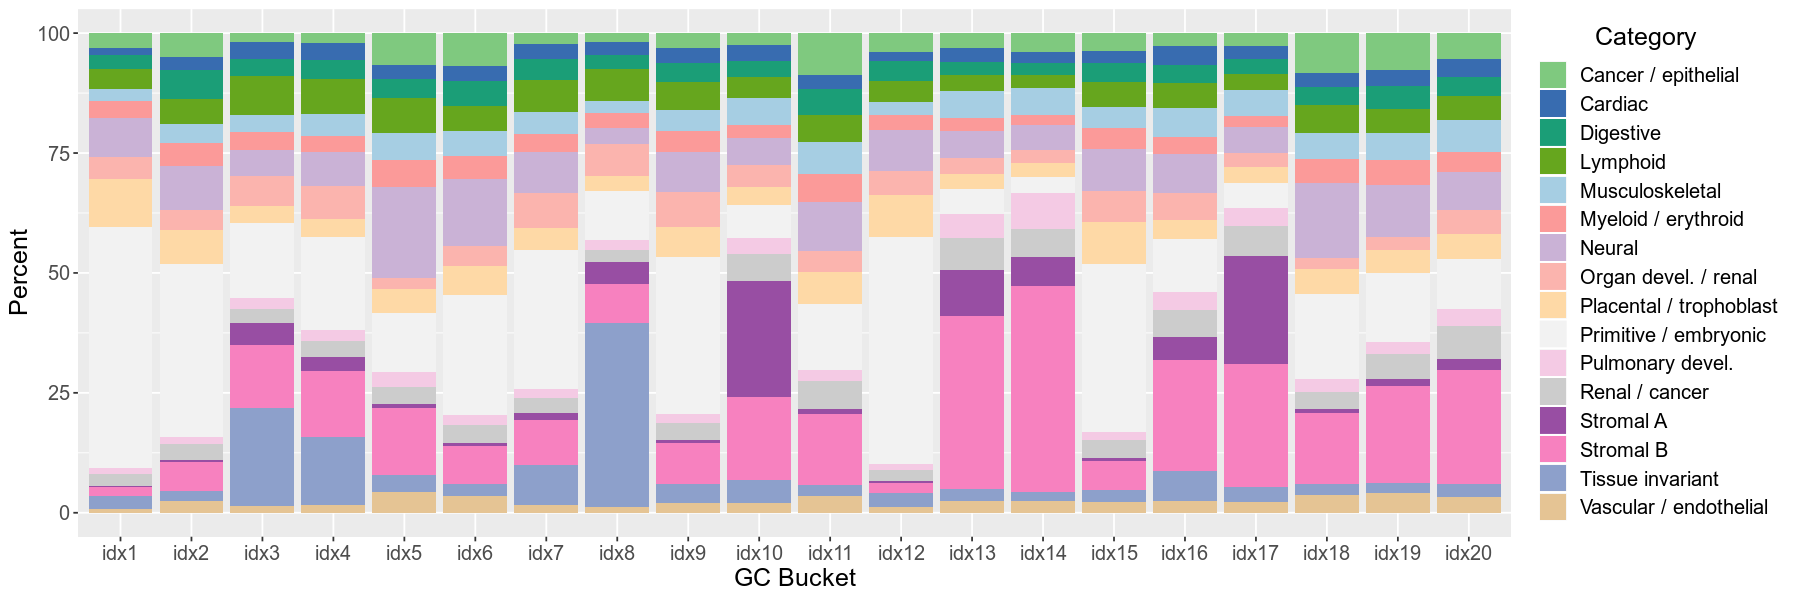

In [63]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(dhs_annotated_df_percentage), aes(x=factor(Var2, levels=colnames(dhs_annotated_df_percentage)),
                                    y=value, fill=Var1)) +
scale_fill_manual(values=col_vector[seq(1,length(col_vector),4)]) +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("GC Bucket") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

In [15]:
dhs_annotated_expected = outer((rowSums(dhs_annotated_df)/sum(dhs_annotated_df)), colSums(dhs_annotated_df))
dhs_annotated_expected

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
Cancer / epithelial,773.8189,691.8883,1895.221,2028.820,518.3038,955.9206,1719.263,912.9202,1640.724,1194.0999,844.4813,834.4944,2080.790,1435.8971,1020.2516,2291.911,1336.5553,834.1552,816.4048,1816.080
Cardiac,634.3372,567.1746,1553.606,1663.123,424.8789,783.6148,1409.364,748.3653,1344.981,978.8620,692.2626,684.0758,1705.725,1177.0750,836.3501,1878.791,1095.6396,683.7978,669.2469,1488.729
Digestive,773.6379,691.7264,1894.778,2028.346,518.1825,955.6969,1718.860,912.7066,1640.340,1193.8205,844.2837,834.2991,2080.303,1435.5611,1020.0129,2291.374,1336.2425,833.9600,816.2138,1815.655
Lymphoid,1100.1918,983.7053,2694.567,2884.514,736.9083,1359.0982,2444.394,1297.9616,2332.730,1697.7342,1200.6573,1186.4582,2958.403,2041.5140,1450.5621,3258.567,1900.2728,1185.9760,1160.7390,2582.046
Musculoskeletal,1018.5005,910.6633,2494.490,2670.333,682.1915,1258.1827,2262.893,1201.5855,2159.521,1571.6743,1111.5063,1098.3615,2738.736,1889.9278,1342.8552,3016.613,1759.1740,1097.9151,1074.5520,2390.324
Myeloid / erythroid,761.5366,680.9064,1865.140,1996.618,510.0771,940.7478,1691.974,898.4300,1614.682,1175.1467,831.0774,821.2489,2047.763,1413.1060,1004.0578,2255.532,1315.3409,820.9152,803.4465,1787.254
Neural,1635.0630,1461.9452,4004.562,4286.854,1095.1649,2019.8399,3632.765,1928.9809,3466.814,2523.1077,1784.3711,1763.2688,4396.665,3034.0201,2155.7700,4842.758,2824.1128,1762.5522,1725.0460,3837.337
Organ devel. / renal,1032.2314,922.9404,2528.120,2706.333,691.3884,1275.1448,2293.401,1217.7847,2188.634,1592.8628,1126.4911,1113.1690,2775.658,1915.4068,1360.9588,3057.281,1782.8903,1112.7166,1089.0385,2422.549
Placental / trophoblast,996.0784,890.6153,2439.575,2611.546,667.1731,1230.4840,2213.076,1175.1329,2111.979,1537.0742,1087.0367,1074.1813,2678.443,1848.3214,1313.2925,2950.202,1720.4461,1073.7447,1050.8959,2337.701
Primitive / embryonic,3722.9739,3328.7916,9118.231,9760.998,2493.6473,4599.0957,8271.664,4392.2135,7893.800,5745.0167,4062.9425,4014.8936,10011.034,6908.3440,4908.6032,11026.769,6430.3934,4013.2618,3927.8616,8737.466


In [58]:
dhs_annotated_fc = dhs_annotated_df/dhs_annotated_expected
dhs_annotated_fc

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cancer / epithelial,0.84257435,1.3210225,0.5038989,0.5490875,1.7673033,1.8076815,0.6287579,0.4929237,0.8069609,0.6599113,2.3245038,1.05333245,0.8145944,1.0376788,0.9752496,0.7081428,0.7137752,2.1878423,2.0271806,1.4542315
Cardiac,0.44771141,0.8480633,1.1489403,1.1147701,0.9320302,1.0464325,0.9940657,0.8979572,1.0104229,1.0675662,0.9635072,0.61689070,0.9374311,0.7552620,0.8584922,1.3184010,0.8743751,0.9417989,1.1087089,1.2137870
Digestive,0.74841216,1.6234743,0.9536738,1.0560330,1.0652617,1.3456149,1.1670523,0.7833843,1.0906276,0.8711527,1.3940811,1.10272202,0.7099926,0.6366848,0.9990070,0.9836891,0.8052431,1.0288263,1.2472223,1.0376423
Lymphoid,0.78259084,0.9748855,1.4878086,1.3922623,1.3393797,0.9888910,1.2297525,1.2203751,1.0674188,0.8222724,1.0652498,0.79058832,0.6260134,0.5143242,1.0078851,0.9654550,0.6514854,1.0775935,0.9631795,0.9465364
Musculoskeletal,0.52037285,0.8202812,0.7296079,0.8931469,1.1389764,1.0340311,0.9165257,0.5234750,0.9085350,1.1376403,1.3531187,0.57540255,1.1625801,1.1270272,0.8668098,1.2308508,1.0612935,1.0784077,1.1204670,1.3199048
Myeloid / erythroid,0.97040643,1.2777087,1.0165458,0.9295718,1.5448646,1.3212892,1.0006065,0.8258852,1.1290152,0.7479917,1.5497955,0.84505436,0.6978346,0.5880663,1.1533201,0.9487782,0.6408985,1.3655492,1.4089301,1.1582013
Neural,1.00424267,1.1354735,0.6724830,0.8812989,2.3777241,1.7392468,1.0818205,0.4302790,1.0614932,0.7122169,1.2777611,1.07187285,0.7062170,0.6562251,1.1123636,1.0120266,0.6731318,1.9693034,1.3593841,0.9829732
Organ devel. / renal,0.91742996,0.8288726,1.2337232,1.3852691,0.4642832,0.8344150,1.4410914,1.3031860,1.4451936,0.8845709,0.8992526,1.00703485,0.6812798,0.5356564,1.2638148,1.1284537,0.5995882,0.4430598,0.5298251,0.9972967
Placental / trophoblast,2.06007883,1.4630335,0.7329147,0.7482157,1.0297177,1.2734826,0.9565870,0.6492883,1.2893119,0.7761499,1.3844979,1.78740784,0.6600849,0.5859371,1.8168078,0.7989282,0.6707563,1.0700868,1.0134210,1.0578768


In [59]:
# dhs_annotated_fc = dhs_annotated_fc[, c("idx2", "idx12", "idx9", "idx7", "idx1", "idx15", # open on-target
#                                         "idx5", "idx11", "idx20", "idx18", "idx19")] # open transient
#                                         "idx13", "idx14", "idx17", "idx10", "idx16")] # close

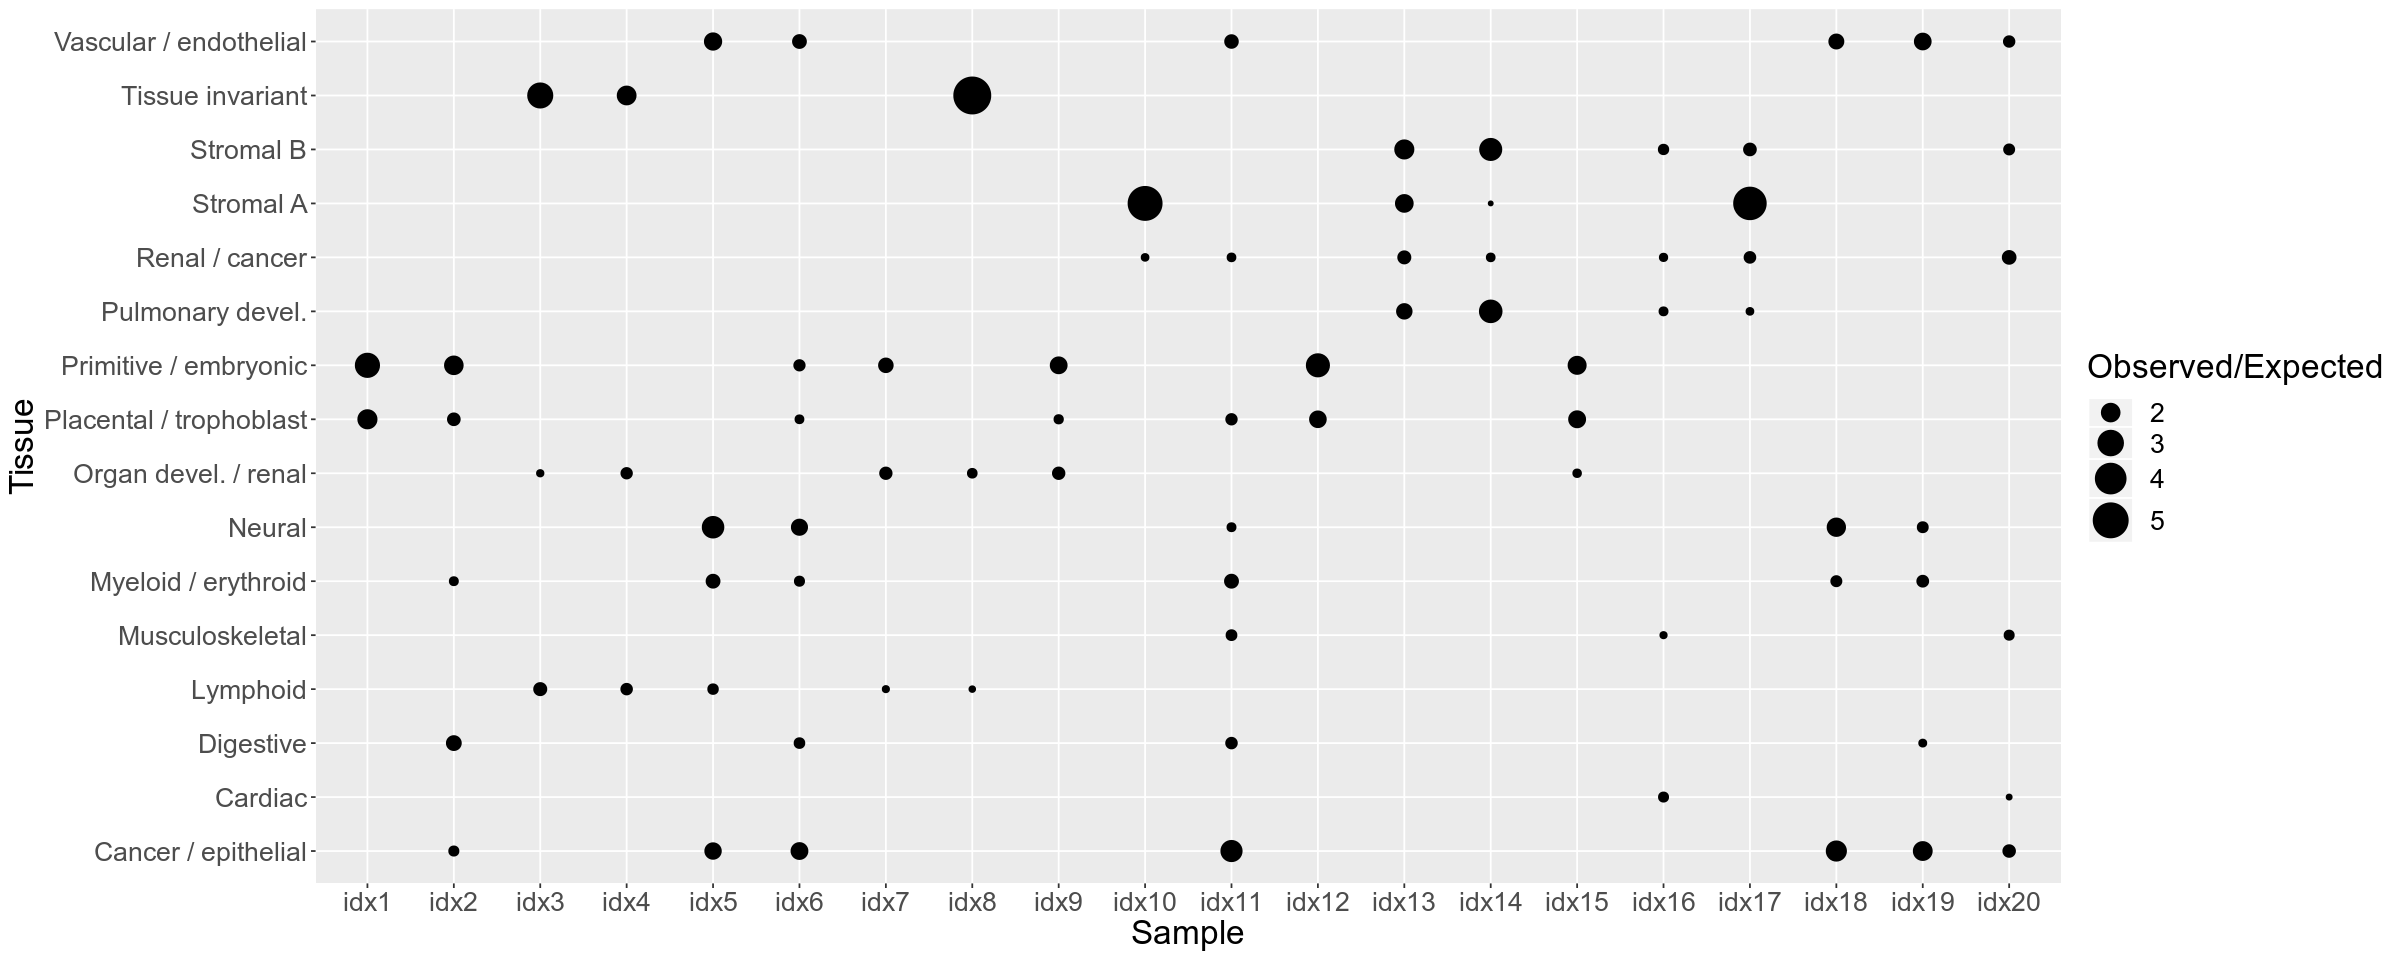

In [60]:
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(melt(as.matrix(dhs_annotated_fc))[melt(as.matrix(dhs_annotated_fc))$value>1.2,], aes(x=factor(Var2, levels=colnames(dhs_annotated_fc)), 
                                                       y=Var1, size=value)) +
xlab("Sample") +
ylab("Tissue") +
geom_point() + 
scale_size_continuous(range = c(1, 10)) +
theme(legend.title.align=0.4,
text=element_text(size=20)) +
labs(size='Observed/Expected') 

In [55]:
# fraction per peak set that overlap with at least one peak in reference
perc_overlap = list()
for (i in bed_names) {
    peaks = read.table(sprintf("%s/%s.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks = makeGRangesFromDataFrame(peaks)
    
    perc_overlap[[i]] = 100*length(unique(queryHits(findOverlaps(peaks,annotations))))/(length(peaks))
}

In [56]:
# perc_overlap = perc_overlap[c("idx2", "idx12", "idx9", "idx7", "idx1", "idx15", # open on-target
#                                         "idx5", "idx11", "idx20", "idx18", "idx19")] # transient

No id variables; using all as measure variables



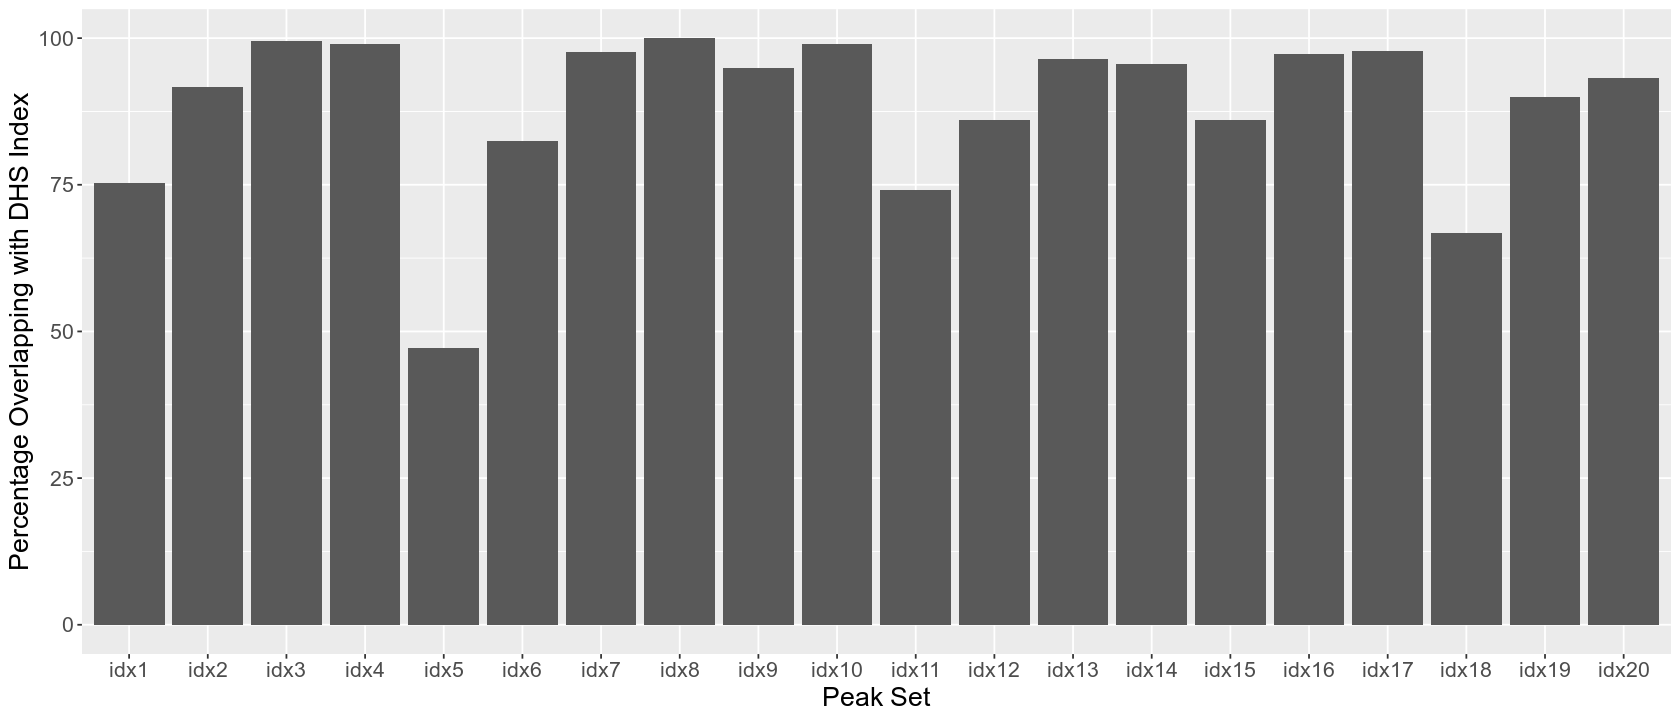

In [57]:
options(repr.plot.width = 14, repr.plot.height = 6)
ggplot(melt(data.frame(perc_overlap)), aes(x=variable,y=value))+
geom_bar(stat="identity") +
xlab("Peak Set") + 
ylab("Percentage Overlapping with DHS Index") +
theme(legend.title.align=0.4, text=element_text(size=16)) 